In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
import numpy as np

In [ ]:
(x_trn, y_trn), (x_tst, y_tst) = cifar100.load_data(label_mode='fine')

In [ ]:
# Фильтрация изображений по классам "морские животные" и "рыбы"
# индекс класса "морских животных" (	beaver - 4, dolphin - 30, otter - 55, seal - 72, whale - 95)

# индекс класса "рыб" (	aquarium fish - 1, flatfish - 32, ray - 67, shark - 73, trout -91)

x_image_beaver_trn = x_trn[y_trn.flatten() == 4]
x_image_dolphin_trn = x_trn[y_trn.flatten() == 30]
x_image_otter_trn = x_trn[y_trn.flatten() == 55]
x_image_seal_trn = x_trn[y_trn.flatten() == 72]
x_image_whale_trn = x_trn[y_trn.flatten() == 95]

x_image_aquarium_fish_trn = x_trn[y_trn.flatten() == 1]
x_image_flatfish_trn = x_trn[y_trn.flatten() == 32]
x_image_ray_trn = x_trn[y_trn.flatten() == 67]
x_image_shark_trn = x_trn[y_trn.flatten() == 73]
x_image_trout_trn = x_trn[y_trn.flatten() == 91]



x_image_beaver_tst = x_tst[y_tst.flatten() == 4]
x_image_dolphin_tst = x_tst[y_tst.flatten() == 30]
x_image_otter_tst = x_tst[y_tst.flatten() == 55]
x_image_seal_tst = x_tst[y_tst.flatten() == 72]
x_image_whale_tst = x_tst[y_tst.flatten() == 95]

x_image_aquarium_fish_tst = x_tst[y_tst.flatten() == 1]
x_image_flatfish_tst = x_tst[y_tst.flatten() == 32]
x_image_ray_tst = x_tst[y_tst.flatten() == 67]
x_image_shark_tst = x_tst[y_tst.flatten() == 73]
x_image_trout_tst = x_tst[y_tst.flatten() == 91]

In [ ]:
def create_x(img1, img2, img3, img4, img5):
  x_image = np.append(img1, img2, axis=0)
  x_image = np.append(x_image, img3, axis=0)
  x_image = np.append(x_image, img4, axis=0)
  x_image = np.append(x_image, img5 ,axis=0)
  return x_image

In [ ]:
# trn
x_image_zeros_trn = create_x(x_image_beaver_trn, x_image_dolphin_trn, x_image_otter_trn, x_image_seal_trn, x_image_whale_trn)
x_image_ones_trn = create_x(x_image_aquarium_fish_trn, x_image_flatfish_trn, x_image_ray_trn, x_image_shark_trn, x_image_trout_trn)

x_image_trn = np.append(x_image_zeros_trn, x_image_ones_trn ,axis=0)
y_label_trn = np.append(np.zeros(len(x_image_zeros_trn)),np.ones(len(x_image_ones_trn)) ,axis=0)


#tst
x_image_zeros_tst = create_x(x_image_beaver_tst, x_image_dolphin_tst, x_image_otter_tst, x_image_seal_tst, x_image_whale_tst)
x_image_ones_tst = create_x(x_image_aquarium_fish_tst, x_image_flatfish_tst, x_image_ray_tst, x_image_shark_tst, x_image_trout_tst)

x_image_tst = np.append(x_image_zeros_tst, x_image_ones_tst ,axis=0)
y_label_tst = np.append(np.zeros(len(x_image_zeros_tst)), np.ones(len(x_image_ones_tst)) ,axis=0)

print(x_image_tst.shape)
print(y_label_tst.shape)

(1000, 32, 32, 3)
(1000,)


In [ ]:
num_features = 32 * 32
num_classes = 2

lr = 0.01
epochs = 10000
batch_size = 64
display_epoch = 10

In [ ]:
x_train = (np.array(x_image_trn, np.float32)).reshape(([-1, num_features * 3])) / 255.0
x_test = (np.array(x_image_tst, np.float32)).reshape(([-1, num_features * 3])) / 255.0


y_train = tf.one_hot(y_label_trn, depth = num_classes)
y_test = tf.one_hot(y_label_tst, depth = num_classes)

In [ ]:
y_test[:10]

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
print(train_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 3072), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [ ]:
all_losses = []
all_accuracy = []
all_epochs = []

In [ ]:
class Model(object):
    def __init__(self):
        rnd_norm = tf.initializers.RandomNormal()
        self.W1 = tf.Variable(rnd_norm([num_features * 3, 128]))
        self.W2 = tf.Variable(rnd_norm([128, 64]))
        self.W3 = tf.Variable(rnd_norm([64, 32]))
        self.Wout = tf.Variable(rnd_norm([32, 2]))
        self.B1 = tf.Variable(tf.zeros([128]))
        self.B2 = tf.Variable(tf.zeros([64]))
        self.B3 = tf.Variable(tf.zeros([32]))
        self.Bout = tf.Variable(tf.zeros([2]))


    def forward(self, x):
        self.layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, self.W1), self.B1))
        self.layer2 = tf.nn.sigmoid(tf.add(tf.matmul(self.layer1, self.W2), self.B2))
        self.layer3 = tf.nn.sigmoid(tf.add(tf.matmul(self.layer2, self.W3), self.B3))
        self.output = tf.nn.softmax(tf.add(tf.matmul(self.layer3, self.Wout), self.Bout))
        return self.output

In [ ]:
def loss(y_pred, y_target):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_target * tf.math.log(y_pred)))
    return cross_entropy

In [ ]:
def accuracy(y_pred, y_target):
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_target, 1))
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return acc

In [ ]:
model = Model()
optimizer = tf.optimizers.SGD(lr)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
def optimization(x, y):
    with tf.GradientTape() as gt:
        cur_loss = loss(model.forward(x), y)

    trainable_variables = [model.W1, model.W2, model.W3, model.Wout, model.B1, model.B2, model.B3, model.Bout]
    grad = gt.gradient(cur_loss, trainable_variables)
    optimizer.apply_gradients(zip(grad, trainable_variables))

In [ ]:
def train(epochs):
    for epoch, (batch_x, batch_y) in enumerate(train_data.take(epochs), 1):
        optimization(batch_x, batch_y)
        if(epoch % 100 == 0):
            pred = model.forward(batch_x)
            loss_r = loss(pred, batch_y)
            acc_r = accuracy(pred, batch_y)
            all_losses.append(loss_r)
            all_accuracy.append(acc_r)
            all_epochs.append(epoch)
            print("Epoch {0} Loss is {1} Accuracy is {2}".format(epoch, loss_r, acc_r))

    return model

In [ ]:
model = train(7000)

Epoch 100 Loss is 44.23456573486328 Accuracy is 0.53125
Epoch 200 Loss is 44.409236907958984 Accuracy is 0.5
Epoch 300 Loss is 42.35166549682617 Accuracy is 0.625
Epoch 400 Loss is 43.62193298339844 Accuracy is 0.578125
Epoch 500 Loss is 43.29901123046875 Accuracy is 0.59375
Epoch 600 Loss is 44.28205871582031 Accuracy is 0.484375
Epoch 700 Loss is 42.73082733154297 Accuracy is 0.5625
Epoch 800 Loss is 36.286407470703125 Accuracy is 0.765625
Epoch 900 Loss is 31.873138427734375 Accuracy is 0.765625
Epoch 1000 Loss is 39.25028991699219 Accuracy is 0.65625
Epoch 1100 Loss is 39.74945831298828 Accuracy is 0.59375
Epoch 1200 Loss is 34.845333099365234 Accuracy is 0.765625
Epoch 1300 Loss is 35.4542350769043 Accuracy is 0.71875
Epoch 1400 Loss is 32.34001159667969 Accuracy is 0.71875
Epoch 1500 Loss is 38.482688903808594 Accuracy is 0.671875
Epoch 1600 Loss is 34.43408966064453 Accuracy is 0.78125
Epoch 1700 Loss is 37.11182403564453 Accuracy is 0.703125
Epoch 1800 Loss is 32.08201599121094

In [ ]:
pred_val = model.forward(x_test)
print("Test accuracy is %f" % accuracy(pred_val, y_test))

Test accuracy is 0.671000


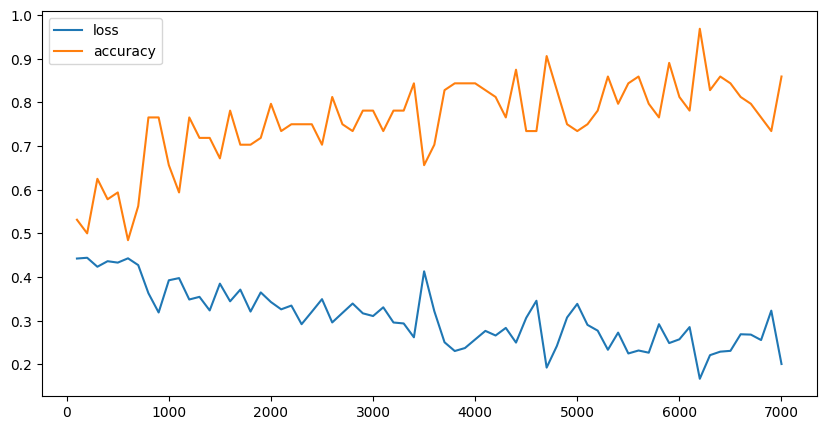

In [ ]:
all_losses = np.array(all_losses) / 100.0

fig, axs = plt.subplots(figsize = (10, 5))
plt.plot(all_epochs, all_losses, label = "loss")
plt.plot(all_epochs, all_accuracy, label = "accuracy")
plt.legend()
plt.show()